In [1]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import numpy as np

from grr.cell_class import Cell

In [3]:
DATA_PATH = os.path.join('data', 'raw', 'GABA', 'adaptation_current')
fnames = pd.read_csv(os.path.join(DATA_PATH, 'index.csv'))
fnames

,Cell,R,C,hold,steps,adaptation
0,SOM_36,1000,25,NaN,20105001.abf,20105000.abf
1,SOM_38,1400,22,NaN,20105005.abf,20105005.abf
2,SOM_39,1000,46,NaN,20105007.abf,20105006.abf


In [4]:
recs = Cell().read_ABF([os.path.join(DATA_PATH, fname) for fname in fnames['adaptation']])

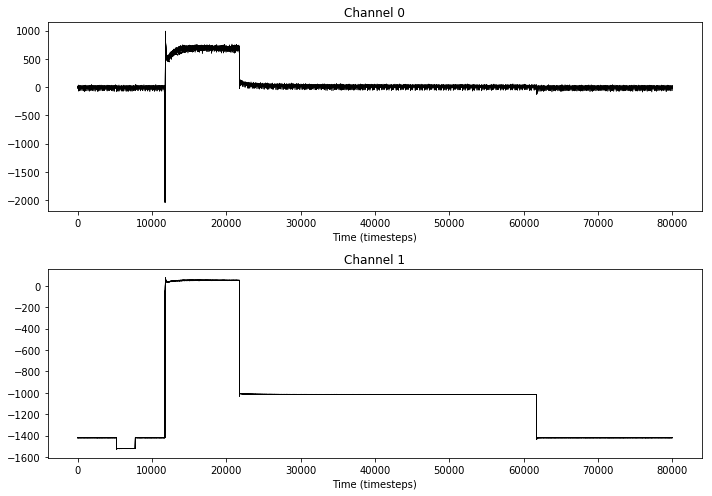

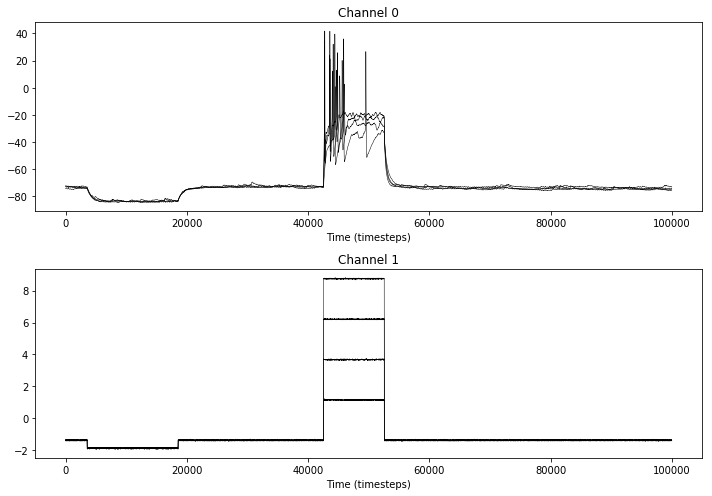

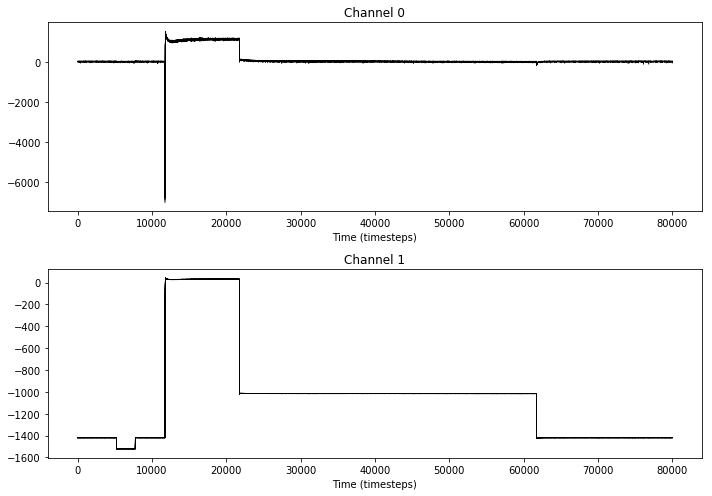

In [5]:
for rec in recs:
    rec.plot()

(-200, 200)

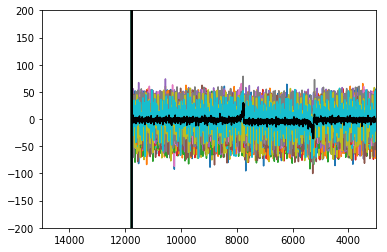

In [11]:
plt.plot(recs[0][0, ...])
plt.plot(recs[0][0, ...].mean(axis=1), 'k-')
plt.xlim(15000, 3000)
plt.ylim(-200, 200)

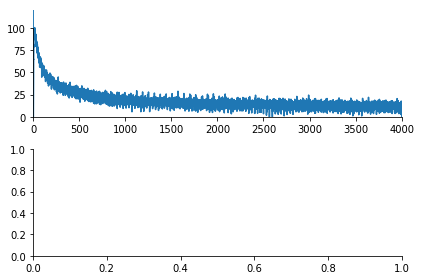

In [10]:
plateau_offset = 2175.0

recs[2].set_dt(0.1)
t_vec = recs[2].t_mat[0, :, 0] - plateau_offset
mean_rec = recs[0][0, ...].mean(axis=1)

plt.figure()

plt.subplot(211)
plt.plot(t_vec, mean_rec)
plt.xlim(0, 4000)
plt.ylim(0, 120)

plt.subplot(212)
#plt.plot(t_vec, mean_rec[1, ...])

plt.tight_layout()
sns.despine(trim=True)

plt.show()

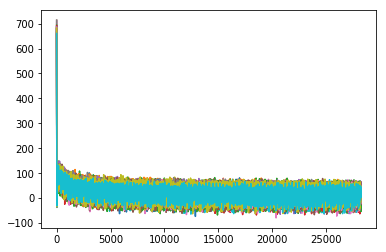

In [7]:
plt.plot(recs[0][0, 21750:50000, :])

(4000, 6000)

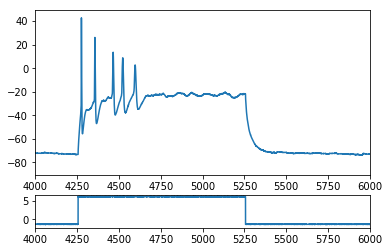

In [8]:
recs[1].set_dt(0.1)
t_vec = recs[1].t_mat[0, :, 0]

spec = gs.GridSpec(2, 1, height_ratios = [1, 0.2])

plt.subplot(spec[0, :])
plt.plot(t_vec, recs[1][0, :, 2])
plt.xlim(4000, 6000)

plt.subplot(spec[1, :])
plt.plot(t_vec, recs[1][1, :, 2])
plt.xlim(4000, 6000)